Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Alexandra Sharapova"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [5]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = self.xk.shape[0]

        def L(x, n, k):
            rez = 1
            for i in range(n):
                if (i != k):
                    rez *= (x - self.xk[i]) / (self.xk[k] - self.xk[i])
            return rez
        
        lagrv = 0
        for j in range(n):
            lagrv += self.yk[j] * L(x, n, j)
        return lagrv

In [6]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [7]:
import matplotlib.pyplot as plt

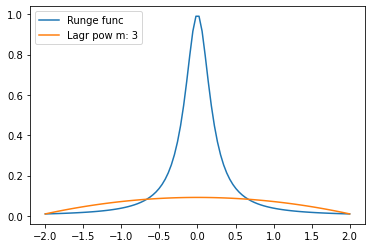

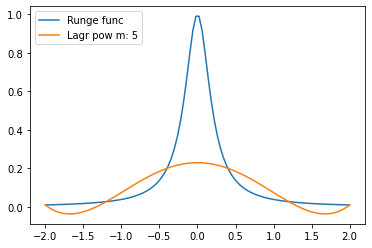

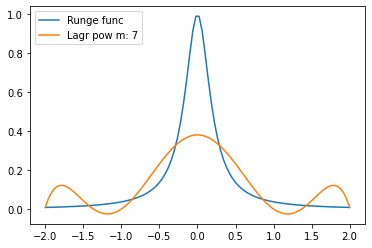

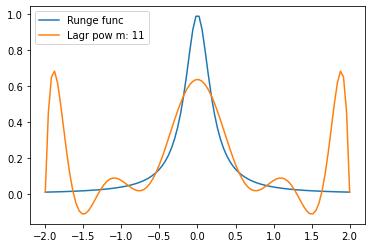

In [11]:
x = np.linspace(-2, 2, 100)
y = runge_func(x)
m_list = [3, 5, 7, 11]
for i in m_list:
    x_new = np.linspace(-2, 2, i + 1)
    y_new = runge_func(x_new)
    
    lg = LagrangeInterpolator(x_new, y_new)
    lg_list = np.array([lg(xx) for xx in x])

    plt.figure()
    plt.plot(x, y, label="Runge func")
    plt.plot(x, lg_list, label="Lagr pow m: " + str(i))
    plt.legend(loc='upper left')
    plt.show()

Повторим предыдущее задание используя узлы Чебышева



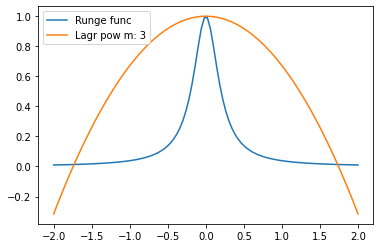

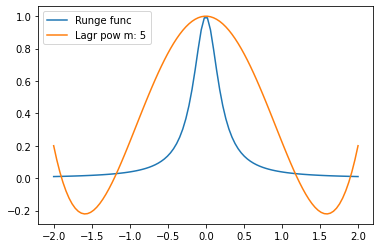

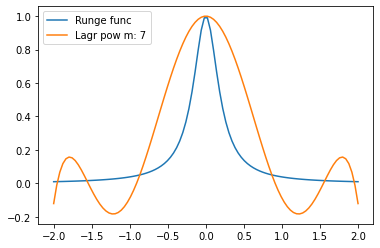

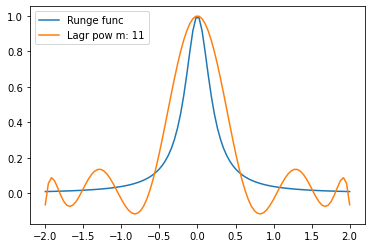

In [13]:
left = -2
right = 2
m_list = [3, 5, 7, 11]
x = np.linspace(-2, 2, 100)
y = runge_func(x)

for i in m_list:
    x_list = np.array([0.5 * (left + right) + 0.5 * (right - left) * \
                       np.cos(((2 * k - 1) * np.pi) / (2 * i)) for k in range(1, i + 1)])
    
    y_list = runge_func(x_list)

    lg = LagrangeInterpolator(x_list, y_list)
    lg_list = np.array([lg(xx) for xx in x])

    plt.figure()
    plt.plot(x, y, label="Runge func")
    plt.plot(x, lg_list, label="Lagr pow m: " + str(i))
    plt.legend(loc='upper left')
    plt.show()


Таким образом, узлы Чебышева превосходят по качеству интерполяцию на равномерной сетке
